# Wilkommen
**Data Augmentation** - *Mit wenigen Daten vieles Schaffen!*

![](https://i.imgur.com/BYLPZEr.jpg)



## Vorbereitung
* Zunächst müssen wir überprüfen, ob eine GPU vorhanden ist (falls es hier einen Fehler gibt, bitte unter *Bearbeiten* --> *Notebook-Einstellungen* sicherzustellen, dass bei *Hardwarebeschleuniger* GPU eingestellt ist)

Bitte hier einmal alle Zellen laufen lassen. Währenddessen [Blitz-Umfrage💭](https://www.menti.com/tjpn1cuw9y) ausfüllen!?









---
### Wissensblock: Graphics Processing Unit (GPU)
Das Training von Neuronale Netze besteht letztendlich nur aus ganz vielen (kleinen) Matrixmultiplikationen.


CPUs sind darauf optimiert, einzelne Aufgaben nacheinander (oder wenige parallel auszuführen, Anhaltspunkt acht Kerne impliziert 8 Aufgaben parallel). Im Gegenzug dazu sind GPUs uhrsprünglich optimiert für das Rendering von Bildern mit hohen Bildwiederholraten (am häufigsten Bilder in Videospielen). Da Grafiktexturierung und Schattierung mehr parallel ausgeführte Matrix- und Vektoroperationen erfordern, als eine CPU (Central Processing Unit) vernünftigerweise bewältigen kann, wurden GPUs entwickelt, um diese Berechnungen effizienter durchzuführen.



| GPU                     |            CPU            |
| ----------------------- | :-----------------------: |
| Optimierte, aber begrenzte Operationen |  Komplexe, vielfältige Operationen  |
| Langsam (1-2 Ghz)          |      Schnell (3-4 Ghz)       |
| viele > 1000 Kerne            |        wenige < 100 Kerne        |
| Schneller dedizierter Arbeitsspeicher (VRAM)     | größerer Arbeitsspeicher (RAM) |


Das bedeutet, dass wir mit einer GPU um Faktor 10-15 schneller sind als mit einer CPU.
---

In [1]:
!nvidia-smi

Fri Dec 10 10:57:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

* Zum Downloaden von Daten aus Online Quellen brauchen wir eine weitere Bibliothek (inkl. Abhänigkeiten)

In [2]:
!apt-get install libmagic-dev
!pip install icrawler python-magic
!git clone https://github.com/prairie-guy/ai_utilities.git
import sys
sys.path.append('/root/')
from ai_utilities import *
!pip install torch==1.7.1 # LSTMs wurden in torch 1.8 geändert und textattack noch nicht geupdatet
!pip install textattack

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-dev libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 332 kB of archives.
After this operation, 5,552 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-dev amd64 1:5.32-2ubuntu0.4 [79.7 kB]
Fetched 332 kB in 2s (170 kB/s)
Selecting previously unselected package libmagic-mgc.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.32-2ubuntu0.4_a

In [3]:
# Bibliotheken für das Anzeigen von Grafiken
%matplotlib inline
from matplotlib import pyplot as plt
# Bibliothek für Mathe Dinge
import numpy as np
# Bibliothek für Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Um was geht es heute?

👉🏻 Was ist Data Augmentation?

👉🏻  Warum ist Data Augmentation?

👉🏻  Wie wende ich Data Augmentation an?

👉🏻  Wo geht die Reise hin?
 


*Interaktiv - Fragen, Kommentare, Wünsche immer gerne!*

# Was ist Data Augmentation?
--- 
*Wir erzeugen neue Daten indem wir bestehende Daten **sinnvoll** verändern.*

![](https://i.imgur.com/eulIQhy.png)

3 Probleme: 

* Augmentierte Daten müssen ähnlich genug *und* unterschiedlich genug sein. 
* Domänenwissen muss vorhanden sein
* mehr Daten = besseres Modell *aber auch* mehr Daten = mehr Trainingszeit

Beispiel zu Domänenwissen - Wo ist die 6?

![](https://i.imgur.com/VGwRjZx.png)

# Warum ist Data Augmentation?

## Wissenblock Over- & Underfittung
__Overfitting und Underfitting beim maschinellen Lernen__

Wir müssen immer bedenken, dass wir ein Modell für maschinelles Lernen entwerfen und nicht einen "klassischen" Algorithmus. Im Allgemeinen können wir sagen, dass ein gut entworfenes Modell in der Lage sein wird, auch auf alle möglichen Arten von Dateneingaben der *Domäne* zu generalisieren. Ein Beispiel: Ein auf Hunde trainierter Bildklassifikator, der gut genug *generalisiert*, wird in der Lage sein, einen Husky als Hund zu klassifizieren, obwohl in den Trainingsdaten keine Huskys vorhanden sind. Das gleiche Prinzip gilt für Vorhersagen. Ein gut generalisiertes Modell wird in der Lage sein, gute Vorhersagen auf Basis von Daten zu machen, die es noch nie gesehen hat, solange die Daten nicht völlig anders strukturiert oder beschaffen sind.


Für uns ist es wichtig zu wissen, ob unser Modell gut verallgemeinert oder nicht. Man könnte sagen, dass es wichtig ist, ein passendes Modell für die Problemdomäne zu erstellen. Dies ist jedoch von vielen Faktoren abhängig. Beim maschinellen Lernen beschreiben die Begriffe "Overfitting" (Überanpassung) und "Underfitting" (Unteranpassung) zwei Probleme, die mit der Fähigkeit des Modells zur Generalisierung zusammenhängen.

**Underfitting:**
Ein statistisches Modell oder ein Algorithmus für maschinelles Lernen wird als Underfitting bezeichnet, wenn es den zugrunde liegenden Trend der Daten nicht erfassen kann. Sein Auftreten bedeutet, dass das Modell oder der Algorithmus sich nicht gut genug an die Daten anpasst. Wenn das Modell underfittet, ist es nicht komplex genug, um die Eigenschaften der Daten zu erfassen (z. B. Verwendung eines linearen Modells auf nicht-linearen Daten). Wenn ein Modell Underfitting aufweist, überdenkt die Auswahl der ML-Methode oder versucht, die Hyperparameter (z.B. Anzahl der Hidden Layers) anzupassen. Es kann aber manchmal hilfreich sein, die Datenmenge soweit zu reduzieren, dass eine Überanpassung vorhanden ist, um herauszufinden, ob das gewählte Modell überhaupt in der Lage ist, die vorhandenen Daten zu repräsentieren.

![](https://i.imgur.com/nEvnPfD.png)


**Overfitting:**
Ein statistisches Modell wird als überangepasst bezeichnet, wenn das Modell die Trainingsdaten gut repräsentiert, aber nicht in der Lage ist, auf neue, nie gesehene Daten zu generalisieren. Ein typisches Merkmal überangepasster Modelle ist z. B., dass sie sogar Artefakte der Daten, wie deren spezifisches Rauschmuster, erlernen. Daher sind überangepasste Modelle oft komplex und hochdimensional. In der Regel haben sie eine hervorragende Leistung, wenn ihnen bekannte Daten gezeigt werden, und fast keine Leistung bei neuen Daten. Bei der Regression kann das Overfitting durch die Wahl der richtigen Modellparameter vermieden werden. Ein Beispiel: Wählen Sie ein lineares Regressionsmodell (nicht ein nicht-lineares), wenn Sie ein lineares Modell erwarten.


**Fazit:**
Ein gut funktionierendes Modell sollte weder unter einer Unteranpassung noch unter einer Überanpassung leiden, sondern sein Verhalten sollte zwischen diesen beiden liegen. Eine Methapter dafür ist die Goldlöckchen-Zone (goldilock-Zone).
![](http://marketbusinessnews.com/wp-content/uploads/2016/05/Goldilocks-Zone-Habitable-Zone.jpg)


Ein einfaches Beispiel ist die Umlaufbahn der Erde. Sie ist nicht zu weit von der Sonne entfernt und daher sind die Temperaturen nicht zu kalt für flüssiges Wasser auf der Oberfläche. Wäre sie zu nah an der Sonne, wäre es zu heiß für flüssiges Wasser. Letztlich wissen wir, dass wir weder zu nah noch zu weit weg sind; daher liegt die Position des Planeten Erde in der Goldlöckchen-Zone.

# Wie wende ich Data Augmentation an?
Stichwort: Domänenwissen!

## Visuelle Daten

### Daten
Wir werden mehrere Ordner für unsere Klassen erstellen: 

*Woher bekommen wir Daten?*
Wir könnten entweder bei Google suchen und die Bilder auf unseren Rechner laden und anschließend hier in Colab hochladen oder wir nutzen ein Tool. (Details finden sich oben in der Vorbereitungssektion) 

In [4]:
classes= ['black bear', 'brown bear', 'polar bear','teddy bear']
for cl in classes:
    image_download(cl, 150)

2021-12-10 11:02:14,493 - INFO - icrawler.crawler - start crawling...
2021-12-10 11:02:14,495 - INFO - icrawler.crawler - starting 2 feeder threads...
2021-12-10 11:02:14,499 - INFO - feeder - thread feeder-001 exit
2021-12-10 11:02:14,500 - INFO - feeder - thread feeder-002 exit
2021-12-10 11:02:14,501 - INFO - icrawler.crawler - starting 2 parser threads...
2021-12-10 11:02:14,521 - INFO - icrawler.crawler - starting 8 downloader threads...
2021-12-10 11:02:14,903 - INFO - parser - parsing result page https://www.bing.com/images/async?q=black bear&first=20
2021-12-10 11:02:14,920 - INFO - parser - parsing result page https://www.bing.com/images/async?q=black bear&first=0
2021-12-10 11:02:15,227 - INFO - downloader - image #1	https://jalife.cafe/wp-content/uploads/2019/09/IMG_9132.jpg
2021-12-10 11:02:15,445 - INFO - downloader - image #2	https://i0.wp.com/nepalensis.com/wp-content/uploads/2018/10/Himalayan-Black-Bear.jpg
2021-12-10 11:02:15,765 - INFO - downloader - image #3	https://


**********************************************************
Path:       /content/dataset/black bear
Removed:    0 duplicate images
Removed:    0 non-jpeg images 
Downloaded: 118 images
**********************************************************


2021-12-10 11:02:42,196 - INFO - parser - parsing result page https://www.bing.com/images/async?q=brown bear&first=20
2021-12-10 11:02:42,227 - INFO - parser - parsing result page https://www.bing.com/images/async?q=brown bear&first=0
2021-12-10 11:02:42,661 - INFO - downloader - image #1	https://fsc.org/sites/default/files/2020-11/iStock-993785856.jpg
2021-12-10 11:02:42,925 - ERROR - downloader - Response status code 403, file https://img.fotocommunity.com/wild-brown-bear-01ec7cfe-22b8-4179-96d6-9eeba82d82e8.jpg
2021-12-10 11:02:43,127 - INFO - downloader - image #2	http://images.fineartamerica.com/images-medium-large-5/alaskan-brown-bear-clint-pickarsky.jpg
2021-12-10 11:02:43,424 - INFO - downloader - image #3	http://s3.amazonaws.com/Photo_of_the_Day/system/uploads/photo/image/286/sized_IMG_2507.jpg
2021-12-10 11:02:43,493 - INFO - downloader - image #4	https://bear.org/wp-content/uploads/2008/01/Grizzly-poster-768x1137.jpg
2021-12-10 11:02:43,904 - INFO - downloader - image #5	htt


**********************************************************
Path:       /content/dataset/brown bear
Removed:    0 duplicate images
Removed:    2 non-jpeg images 
Downloaded: 127 images
**********************************************************


2021-12-10 11:03:13,735 - INFO - parser - parsing result page https://www.bing.com/images/async?q=polar bear&first=0
2021-12-10 11:03:13,779 - INFO - parser - parsing result page https://www.bing.com/images/async?q=polar bear&first=20
2021-12-10 11:03:13,835 - INFO - downloader - image #1	https://3.bp.blogspot.com/-ZyR3lE1WEzw/UvZpjrdsyvI/AAAAAAAABTc/Ii9ZQExbLps/s1600/polar-bear-stock.jpg
2021-12-10 11:03:14,275 - INFO - downloader - image #2	https://www.daysoftheyear.com/wp-content/uploads/polar-bear-day1-scaled.jpg
2021-12-10 11:03:14,318 - INFO - downloader - image #3	https://3.bp.blogspot.com/-SdVG_mLzNBw/TWmHbbBWogI/AAAAAAAAAu0/4rcxMKWCgYM/s1600/012%2BTriplets.jpg
2021-12-10 11:03:15,209 - ERROR - downloader - Response status code 400, file https://media.blogto.com/uploads/2020/11/14/1605384892-20201114-polarbearhabitat-07.jpg
2021-12-10 11:03:15,380 - INFO - downloader - image #4	https://viraltab.news/wp-content/uploads/2020/02/CEN-BabyPolarCub-01-768x512.jpg
2021-12-10 11:03:15,


**********************************************************
Path:       /content/dataset/polar bear
Removed:    0 duplicate images
Removed:    1 non-jpeg images 
Downloaded: 120 images
**********************************************************


2021-12-10 11:03:58,066 - INFO - parser - parsing result page https://www.bing.com/images/async?q=teddy bear&first=20
2021-12-10 11:03:58,102 - INFO - parser - parsing result page https://www.bing.com/images/async?q=teddy bear&first=0
2021-12-10 11:03:58,177 - INFO - downloader - image #1	https://cdn1.bigcommerce.com/n-ww20x/ag5o99/products/2008/images/7646/239526__84687.1579722476.1280.1280.jpg
2021-12-10 11:03:58,193 - INFO - downloader - image #2	https://cdn1.bigcommerce.com/server1900/dee9d/images/stencil/1280x1280/products/970/6781/6ft_Life_Size_Teddy_Bear_Juju_Cuddles_soft_and_huggable_black_bear__10688.1463592716.jpg
2021-12-10 11:03:58,201 - INFO - downloader - image #3	https://cdn11.bigcommerce.com/s-dee9d/images/stencil/1280x1280/products/168/1523/Cozy-Love-Cuddles-cream-teddy-bear-with-heart-38in_1__49584.1295498327.jpg
2021-12-10 11:03:58,219 - INFO - downloader - image #4	https://cdn11.bigcommerce.com/s-dee9d/images/stencil/1280x1280/products/59/9448/Huge_Blue_Teddy_Bear_H


**********************************************************
Path:       /content/dataset/teddy bear
Removed:    0 duplicate images
Removed:    0 non-jpeg images 
Downloaded: 111 images
**********************************************************


Wir machen jetzt etwas ungewöhliches, um bestimme Effekte zu sehen. Wir nutzen einen Großteil (80%) unserer Bilder für die Validierung. *Warum?*

In [5]:
dataset_train = keras.preprocessing.image_dataset_from_directory(
    'dataset',
    batch_size=64,
    image_size=(512, 512),
    labels="inferred",
    label_mode="categorical", # one-hot Encoding [1 0 0 0] 
    subset="training",
    seed=42,
    validation_split=0.9)
dataset_val = keras.preprocessing.image_dataset_from_directory(
    'dataset',
    batch_size=64,
    image_size=(512, 512),
    labels="inferred",
    label_mode="categorical",
    subset="validation",
    seed=42,
    validation_split=0.9)

Found 476 files belonging to 4 classes.
Using 48 files for training.
Found 476 files belonging to 4 classes.
Using 428 files for validation.


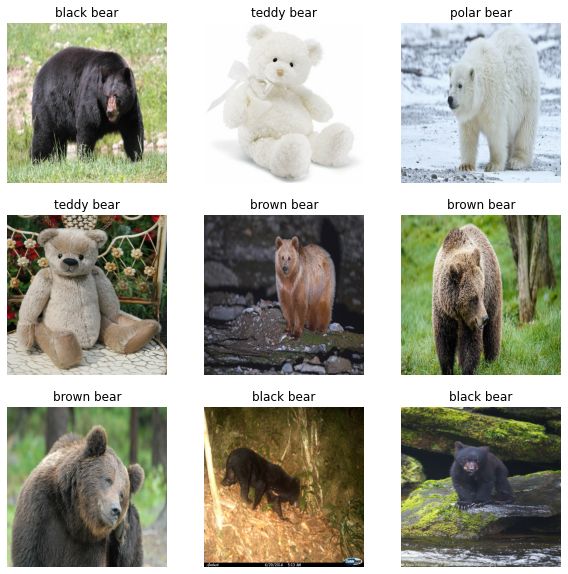

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(classes[labels[i].numpy().argmax()]))
        plt.axis("off")

### Model

In [12]:
base_model = VGG16(weights='imagenet', include_top=False)

In [13]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
# Wir fügen einen Dense Top Layer hinzu
x = layers.Dense(1024, activation='relu')(x)
# und einen output layer mit 4 Klassen
predictions = layers.Dense(4, activation='softmax')(x)

In [14]:
model = Model(inputs=base_model.input, outputs=predictions)

In [15]:
for layer in base_model.layers:
    layer.trainable = False # Wir "freezen" alle CNN Layers außer den Output layers

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
    )

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

### Training

In [18]:
history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_val)

Epoch 1/10
1/1 [==============================] - 192s 192s/step - loss: 5.1486 - accuracy: 0.2500 - val_loss: 5.9173 - val_accuracy: 0.3224
Epoch 2/10
1/1 [==============================] - 25s 25s/step - loss: 5.7203 - accuracy: 0.4375 - val_loss: 8.1833 - val_accuracy: 0.3084
Epoch 3/10
1/1 [==============================] - 25s 25s/step - loss: 7.4711 - accuracy: 0.4583 - val_loss: 7.7632 - val_accuracy: 0.3388
Epoch 4/10
1/1 [==============================] - 25s 25s/step - loss: 7.1207 - accuracy: 0.4375 - val_loss: 4.6173 - val_accuracy: 0.4439
Epoch 5/10
1/1 [==============================] - 24s 24s/step - loss: 3.9837 - accuracy: 0.5833 - val_loss: 2.6801 - val_accuracy: 0.5280
Epoch 6/10
1/1 [==============================] - 25s 25s/step - loss: 2.2034 - accuracy: 0.6875 - val_loss: 1.5317 - val_accuracy: 0.6402
Epoch 7/10
1/1 [==============================] - 25s 25s/step - loss: 0.9320 - accuracy: 0.7708 - val_loss: 1.2437 - val_accuracy: 0.6706
Epoch 8/10
1/1 [=========

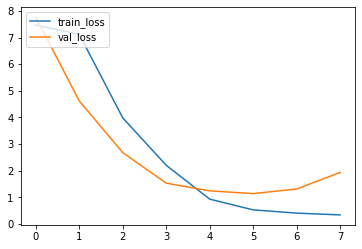

In [19]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

Problem Overfitting:
Der Trainings loss sinkt, während der Validierungsloss steigt. Das ist meist ein Zeichen für *Überanpassung* (Overfitting). 
Überanpassung bedeutet, dass das Netzt beginnt die "wenigen" Bilder die es zur Verfügung hat Auswendig zu lernen und die *Generalisierung*, also der Übertrag auf neue, ungesehene Bilder nicht ausreichend ist.

### Test

polar bear


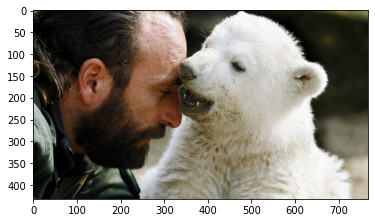

In [ ]:
img = image.load_img("knut.jpeg")
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict(img)
print(classes[result.argmax(axis=-1)[0]])

## 5 Dinge gegen Overfitting

![](https://i.imgur.com/zPjzznR.png)

### Bringen wir Data Augmentation ins Spiel!

In [ ]:
# Helper
def plot_aug(augmentation):
  for images, _ in dataset_train.take(1):
    for i in range(9):
        augmented_images = augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(factor=0.02),
        layers.experimental.preprocessing.RandomCrop(225,225),
        #layers.experimental.preprocessing.Rescaling(1.0 / 255)
    ],
    name="data_augmentation",
)

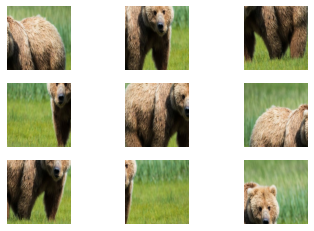

In [ ]:
plot_aug(data_augmentation)

Entweder als Teil des Models (mit `keras.Sequential`), besser wenn Training auf der GPU. 

In [ ]:
# Augmentation zu base model hinzufügen
inputs = keras.Input(shape=(512, 512, 3))
x = data_augmentation(inputs)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
# Wir fügen einen Dense Top Layer hinzu
x = layers.Dense(1024, activation='relu')(x)
# und einen output layer mit 4 Klassen
predictions = layers.Dense(4, activation='softmax')(x)
aug_model = keras.Model(inputs, predictions)

Alternativ: Kann man die Augmentierung auch auf "direkt" auf den Datensatz anwenden. 
```python
augmented_dataset = dataset_train.map(
  lambda x, y: (data_augmentation(x, training=True), y))
```

In [ ]:
aug_model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
    )

In [ ]:
aug_history = aug_model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_val)

Epoch 1/10
1/1 [==============================] - 15s 15s/step - loss: 3.8688 - accuracy: 0.3846 - val_loss: 8.1600 - val_accuracy: 0.4073
Epoch 2/10
1/1 [==============================] - 14s 14s/step - loss: 5.7441 - accuracy: 0.3462 - val_loss: 0.8676 - val_accuracy: 0.7608
Epoch 3/10
1/1 [==============================] - 14s 14s/step - loss: 0.5351 - accuracy: 0.8269 - val_loss: 2.6783 - val_accuracy: 0.6078
Epoch 4/10
1/1 [==============================] - 14s 14s/step - loss: 1.7393 - accuracy: 0.5769 - val_loss: 1.3910 - val_accuracy: 0.7414
Epoch 5/10
1/1 [==============================] - 14s 14s/step - loss: 0.9333 - accuracy: 0.8462 - val_loss: 1.5067 - val_accuracy: 0.7522
Epoch 6/10
1/1 [==============================] - 14s 14s/step - loss: 0.6177 - accuracy: 0.7885 - val_loss: 1.0722 - val_accuracy: 0.8276
Epoch 7/10
1/1 [==============================] - 14s 14s/step - loss: 0.2823 - accuracy: 0.9423 - val_loss: 0.8450 - val_accuracy: 0.8642
Epoch 8/10
1/1 [===========

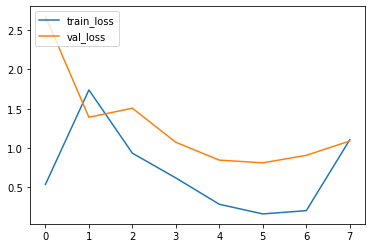

In [ ]:
plt.plot(aug_history.history['loss'][2:])
plt.plot(aug_history.history['val_loss'][2:])
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

ValueError: ignored

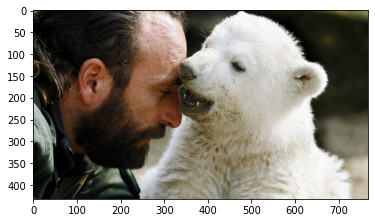

In [ ]:
img = image.load_img("knut.jpeg")
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=aug_model.predict(img)
print(classes[result.argmax(axis=-1)[0]])

**Was passiert hier ?** Warum gibt es jetzt hier einen Fehler?

Antwort: Data Augmentation ist nicht aktiv im Test-Modus (also bei `model.evaluate` oder `model.predict`)

polar bear


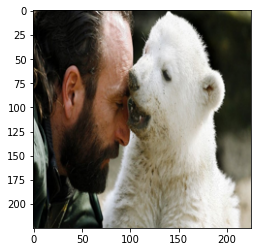

In [ ]:
img = image.load_img("knut.jpeg")
img=img.resize((225,225)) # Resize 
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=aug_model.predict(img) 
print(classes[result.argmax(axis=-1)[0]])

### Regularisierung und ResNet

**Was ist Regularisierung?**
Eine weitere Variante dem Netz das Leben schwer zu machen.

* Dropout
* Batch Normalisation

Aber warum ResNet? Das Geheimnis liegt im *Res* von ResNet.

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Text Daten

[TextAttack 🐙](https://www.aclweb.org/anthology/2020.emnlp-demos.16/) war primär ein Tool für Adverserial Attacks für NLP-Use-Cases.
Wir verwenden das jetzt aber für Data Augmentation!

*Was sind Adverserial Attacks?* Und wie hängen Sie mit Data Augmentation zusammen?

In [ ]:
!pip install textattack
!pip install torch==1.7.1 # LSTMS have been changed in torch 1.8

In [ ]:
from textattack.augmentation import CheckListAugmenter
# Alter default values if desired
augmenter = CheckListAugmenter(pct_words_to_swap=0.4, transformations_per_example=10)

In [ ]:
s = "Hey Simon, I have to tell you that I can not come to Germany in 2 days, as it costs 500€"
# Augment
augmenter.augment(s)

['Hey Ariyana, I have to tell you that I can not come to Andorra in 2 days, as it costs 754€',
 'Hey Eriel, I have to tell you that I can not come to Vanuatu in 2 days, as it costs 95€',
 'Hey Hayden, I have to tell you that I can not come to United Kingdom in 2 days, as it costs 266€',
 'Hey Jeanie, I have to tell you that I can not come to Ghana in 2 days, as it costs 623€',
 'Hey Jeni, I have to tell you that I can not come to South Sudan in 2 days, as it costs 459€',
 'Hey Jenine, I have to tell you that I can not come to Egypt in 2 days, as it costs 591€',
 "Hey Krystyn, I've to tell you that I can not come to Belize in 2 days, as it costs 239€",
 "Hey Norbert, I've to tell you that I can not come to Lithuania in 2 days, as it costs 76€",
 'Hey Norma, I have to tell you that I can not come to Czech Republic in 2 days, as it costs 648€',
 'Jerri Romana, I have to tell you that I can not come to Channel Islands in 2 days, as it costs 780€']

Das ist ein vortrainierter Augmentierer, der folgendes macht: 
* Namen und Orte ersetzten
* Zahlen verändern
* Contraction/Extension (I've<-->I have)
* viel [mehr Varianten](https://textattack.readthedocs.io/en/latest/3recipes/augmenter_recipes.html) verfügbar 

# 3 Aufgaben zum Ausprobieren oder mit nach Hause nehmen
* Mit eigenen visuellen Daten + Augmentierung ein Netz trainieren. (Einsteiger)
* Test-Time Augmentation auf eigenes Projekt anwenden (Mittelstufe)
* Eine eigene Augmentierung implementieren. (Pythonkenntnisse - Fortgeschritten)



# Wo geht die Reise hin ? -  Fortgeschrittene Verfahren


## MixUp

$\begin{array}{l}
\tilde{x}=\lambda x_{i}+(1-\lambda) x_{j}, \quad \text { where } x_{i}, x_{j} \text { are raw input vectors }\\
\tilde{y}=\lambda y_{i}+(1-\lambda) y_{j}, \quad \text { where } y_{i}, y_{j} \text { are one-hot-encoded labels}
\end{array}$

(Quelle[Zhang et. al. - mixup: Beyond Empirical Risk Minimization](https://arxiv.org/abs/1710.09412))

Auf Deutsch. Wir mixen zwei Bilder $i$ und $j$ mit einem Faktor $\lambda$ ([0..1]) und erwarten das der Ausgang des Neuronalen Netzes möglichst den Mix wiedergibt.
![](https://i.imgur.com/qddlZGi.png)

**Hintergrund:**

* geringe Rechenkomplexität
* Verbessert die Robustheit
* Verhindert, dass falsche Labels auswendiggelernt werden

In [ ]:
# Daten Sample
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))
y_train = tf.one_hot(y_train, 10)

x_test = x_test.astype("float32") / 255.0
x_test = np.reshape(x_test, (-1, 28, 28, 1))
y_test = tf.one_hot(y_test, 10)

# Hyperparameters
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 64
EPOCHS = 10

# tf Dataset Objekte
val_samples = 2000
x_val, y_val = x_train[:val_samples], y_train[:val_samples]
new_x_train, new_y_train = x_train[val_samples:], y_train[val_samples:]

train_ds_one = (
    tf.data.Dataset.from_tensor_slices((new_x_train, new_y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((new_x_train, new_y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)
# Die beiden Datasets kombinieren
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(BATCH_SIZE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [ ]:
# Quelle: https://keras.io/examples/vision/mixup/
def sample_beta_distribution(size, concentration_0, concentration_1):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Zwei Datenelemente entpacken
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # lambda Faktor sampeln
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Die Bilder und Labels mixen
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

[0.0, 0.0, 0.0, 0.0, 0.001101851463317871, 0.0, 0.0, 0.0, 0.9988981485366821, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 7.587671279907227e-05, 0.0, 0.0, 0.0, 0.9999241232872009]
[0.0, 0.9976921081542969, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002307891845703125, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.9946801066398621, 0.0, 0.0, 0.0, 0.0, 0.00531991058960557]
[0.0, 0.0, 0.8082307577133179, 0.0, 0.19176924228668213, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.10393530130386353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8960646986961365]
[0.0, 0.15212790668010712, 0.0, 0.0, 0.0, 0.8478720784187317, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7985491752624512, 0.0, 0.20145082473754883, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.9999956488609314, 0.0, 0.0, 0.0, 0.0, 4.3759482650784776e-06]


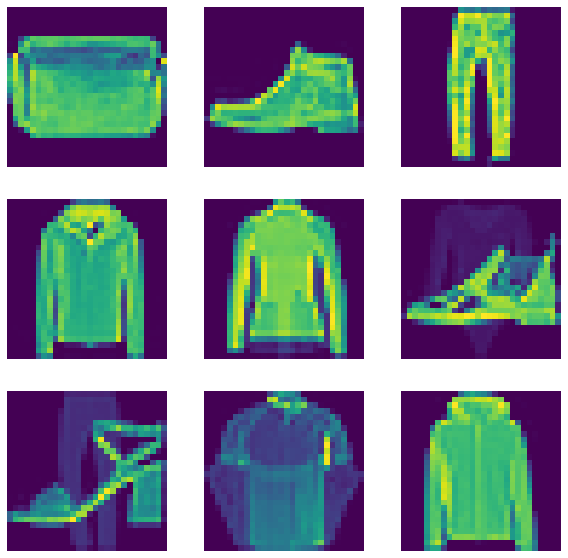

In [ ]:
# Den Datensatz mit der `mix_up` Funktion generieren
train_ds_mu = train_ds.map(
    lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.2), num_parallel_calls=AUTO
)

# Visualisierung der Ergebnisse
sample_images, sample_labels = next(iter(train_ds_mu))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(sample_images[:9], sample_labels[:9])):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().squeeze())
    print(label.numpy().tolist())
    plt.axis("off")

| **Label** | **Description** |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

### Trainingsvergleich

In [ ]:
def get_training_model():
    model = tf.keras.Sequential(
        [
            layers.Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(32, (5, 5), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.2),
            layers.GlobalAvgPool2D(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

In [ ]:
initial_model = get_training_model()
initial_model.save_weights("initial_weights.h5") # gleiche Initialparameter für den Vergleich

In [ ]:
# Ohne Mixup
model = get_training_model()
model.load_weights("initial_weights.h5")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Notice that we are NOT using the mixed up dataset here
model.fit(train_ds_one, validation_data=val_ds, epochs=EPOCHS)
_, test_acc = model.evaluate(test_ds)
print("Ohne Mixup: Genauigkeit auf den Test-Daten: {:.2f}%".format(test_acc * 100))

Epoch 1/10
907/907 [==============================] - 36s 4ms/step - loss: 1.1972 - accuracy: 0.5668 - val_loss: 0.6616 - val_accuracy: 0.7550
Epoch 2/10
907/907 [==============================] - 3s 3ms/step - loss: 0.6459 - accuracy: 0.7526 - val_loss: 0.5477 - val_accuracy: 0.7970
Epoch 3/10
907/907 [==============================] - 3s 3ms/step - loss: 0.5565 - accuracy: 0.7913 - val_loss: 0.4784 - val_accuracy: 0.8255
Epoch 4/10
907/907 [==============================] - 3s 3ms/step - loss: 0.4992 - accuracy: 0.8172 - val_loss: 0.4261 - val_accuracy: 0.8545
Epoch 5/10
907/907 [==============================] - 3s 3ms/step - loss: 0.4582 - accuracy: 0.8305 - val_loss: 0.4017 - val_accuracy: 0.8620
Epoch 6/10
907/907 [==============================] - 3s 3ms/step - loss: 0.4267 - accuracy: 0.8436 - val_loss: 0.3776 - val_accuracy: 0.8635
Epoch 7/10
907/907 [==============================] - 3s 3ms/step - loss: 0.4020 - accuracy: 0.8516 - val_loss: 0.3793 - val_accuracy: 0.8605
Epoch

In [ ]:
# Mit Mixup
model = get_training_model()
model.load_weights("initial_weights.h5")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_ds_mu, validation_data=val_ds, epochs=15)
_, test_acc = model.evaluate(test_ds)
print("Mit Mixup: Genauigkeit auf den Test-Daten: {:.2f}%".format(test_acc * 100))

Epoch 1/15
907/907 [==============================] - 4s 4ms/step - loss: 1.4334 - accuracy: 0.5343 - val_loss: 0.6753 - val_accuracy: 0.7580
Epoch 2/15
907/907 [==============================] - 4s 4ms/step - loss: 0.9549 - accuracy: 0.7223 - val_loss: 0.5662 - val_accuracy: 0.8030
Epoch 3/15
907/907 [==============================] - 4s 4ms/step - loss: 0.8811 - accuracy: 0.7535 - val_loss: 0.4988 - val_accuracy: 0.8270
Epoch 4/15
907/907 [==============================] - 4s 4ms/step - loss: 0.8114 - accuracy: 0.7871 - val_loss: 0.4627 - val_accuracy: 0.8510
Epoch 5/15
907/907 [==============================] - 4s 4ms/step - loss: 0.7826 - accuracy: 0.7964 - val_loss: 0.4209 - val_accuracy: 0.8540
Epoch 6/15
907/907 [==============================] - 4s 4ms/step - loss: 0.7612 - accuracy: 0.8009 - val_loss: 0.3995 - val_accuracy: 0.8655
Epoch 7/15
907/907 [==============================] - 4s 4ms/step - loss: 0.7324 - accuracy: 0.8144 - val_loss: 0.4058 - val_accuracy: 0.8630
Epoch 

## Exkurs: Test-Time Augmentation
Ist es sinnvoll Data Augmentation während des Testens zu verwenden?
JA! Aber anders*


Ähnlich wie Data Augmentation für Trainingsdaten, ist der Zweck der Test Time Augmentation (TTA), zufällige Änderungen an den *Test*bildern vorzunehmen. Anstatt also dem trainierten Modell die regulären, "sauberen" Bilder nur einmal zu zeigen, werden wir ihm die augmentierten Bilder mehrmals zeigen. Anschließend mitteln wir die Vorhersagen über alle Bilder für das entgültige Ergebnis.


In [ ]:
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect',
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [ ]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_datagen.flow(x_val, batch_size=bs, shuffle=False), steps = len(x_val)/bs)#hier könnte dein Datensatz stehen
    predictions.append(preds)

pred = np.mean(predictions, axis=0)

np.mean(np.equal(np.argmax(y_val, axis=-1), np.argmax(pred, axis=-1)))

## GAN für synthetische Trainingsdaten

*Generative Adverserial Networks* sind eine Klasse Neuronaler Netze, die Bilder erzeugen können.

**Die Idee:** Wir können mit ein GAN synthetische Bilder erzeugt, die wir dann für unser eigenes Training nutzen Können.

**Beispiele**

* Wir möchten einen Klassifikator für Kindergesichter (Ethik!?) bauen, wir nutzen ein StyleGAN2 um [synthetische Gesichter zu erzeugen](http://thispersondoesnotexist.com/). 
![](https://i.imgur.com/fXkhp15.jpg)
* Autonomes Fahren: Aus Bildern des Computerspiels GTA machen wir "realistische" Straßenszenen. ([Mehr Details](https://intel-isl.github.io/PhotorealismEnhancement/))
![](https://i.imgur.com/ap68JMx.png)

Was fällt euch ein, wo hattet ihr Probleme, was habt ihr schon für Anwendungsfälle gesehen?

## Automatische Augmentierung I
[RandAugment](https://arxiv.org/abs/1909.13719) ist aktuell der "Place-to-be" für (halb-)automatische Augmentierung. 
Eine Anleitung📕 für Keras findet sich [hier](https://keras.io/examples/vision/randaugment/).

## Automatische Augmentierung II

Robot-powered 🦾 Augmentierung.

![](https://i.imgur.com/VzSs0PA.png)

#### ImageBot - Image Augmentation Inception
![](https://i.imgur.com/SDQ9pUX.png)

## Eigene Augmentierung bauen

In [ ]:
# Entweder als keras Layer

class RandomColorDistortion(tf.keras.layers.Layer): # Beispielcode von https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/06_preprocessing/06e_colordistortion.ipynb
    def __init__(self, contrast_range=[0.5, 1.5], 
                 brightness_delta=[-0.2, 0.2], **kwargs):
        super(RandomColorDistortion, self).__init__(**kwargs)
        self.contrast_range = contrast_range
        self.brightness_delta = brightness_delta
    
    def call(self, images, training=None):
        if not training:
            return images
        
        contrast = np.random.uniform(
            self.contrast_range[0], self.contrast_range[1])
        brightness = np.random.uniform(
            self.brightness_delta[0], self.brightness_delta[1])
        
        images = tf.image.adjust_contrast(images, contrast)
        images = tf.image.adjust_brightness(images, brightness)
        images = tf.clip_by_value(images, 0, 1)
        return images

In [ ]:
# Oder als Data Generator 

class CustomDataGenerator(ImageDataGenerator): # Beispiel von https://stepup.ai/custom_data_augmentation_keras/
  def __init__(self,
               red_range=None,
               green_range=None,
               blue_range=None,
               **kwargs):
    '''
    Custom image data generator.
    Behaves like ImageDataGenerator, but allows color augmentation.
    '''
   	# TODO: IMPLEMENT

  def augment_color(self, image):
    '''Takes an input image and returns a modified version of it'''
    
    # TODO: IMPLEMENT
    
    return image

# Conclusio
Fragen, Kommentare, Diskussion?

👉🏻 [Feedback!](https://www.menti.com/7hs1815mdk) 👈🏻


Danke und bis bald - Fragen, Kommentare oder Wünsche gerne auch an simon@simonklug.de

#Weiterführende Ressourcen
* Ausprobieren 💪🏻
* [albumentations](https://github.com/albumentations-team/albumentations) - Python Tool für fortgeschrittende 
